In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (21,7)

In [ ]:
sminDict = {
    'smin15': 23, 'smin1525': 22, 'smin155': 21, 'smin1575': 20, 'smin16': 19,
    'smin1625': 18, 'smin165': 17, 'smin1675': 16, 'smin17': 15, 'smin175': 14,
    'smin18': 13, 'smin185': 12, 'smin19': 11, 'smin195': 10, 'smin20': 9,
    'smin21': 8, 'smin22': 7, 'smin23': 6, 'smin24': 5, 'smin26': 4, 'smin28': 3
}

# kkKinematic Weight (1-x)^2(1+2x)

## Fit: D6, D8

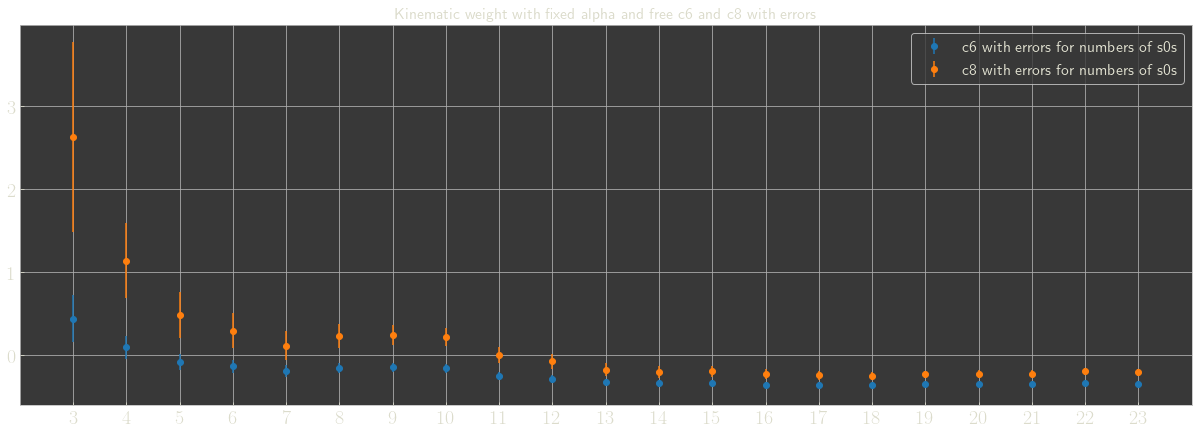

(PCC, p-value): (0.986842333491917, 1.6857835149094689e-16)


In [6]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicD6D8/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23', 'smin24', 'smin26', 'smin28'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
#print('Table:')
#print(df[['c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
c6s = data[:,5]
c6Errs = data[:,6]
c8s = data[:,7]
c8Errs = data[:,8]
s0s = list(range(23, 2, -1))
plt.errorbar(s0s, c6s, yerr=c6Errs, barsabove=True, fmt='.', marker='o')
plt.errorbar(s0s, c8s, yerr=c8Errs, barsabove=True, fmt='.', marker='o')
plt.title('Kinematic weight with fixed alpha and free c6 and c8 with errors')
plt.legend(['c6 with errors for numbers of s0s', 'c8 with errors for numbers of s0s'])
plt.xticks(s0s)
#plt.tick_params(axis='both', which='major', labelsize=20)
plt.show()
print('(PCC, p-value):', stats.pearsonr(c6s, c8s))
bestWKinematicD6D8Row = data[5,:]

### Facts
- D6 and D8 are strongly correlated (PCC of 0.9).
- They converge with increasing s0s close to zero with a slightly negative value.
- Their values get closer with increasing s0s.
- Their errors decrease (vanish) with increasing s0s number.
- It has a sinusial behavior with exponential decreasing amplitude
  (like the DV-model) for an increasing number of s0s.

## Fit: D6, D8, Alpha

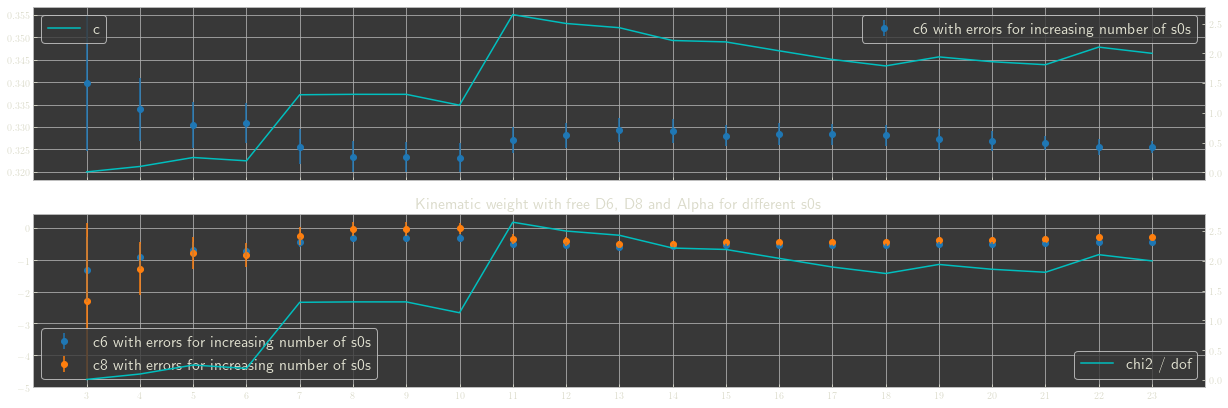

In [72]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicAlphaD6D8/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23', 'smin24', 'smin26', 'smin28'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
# print('Table:')
# print(df[['alpha', 'alphaErr', 'c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
chi2Dofs = data[:,15]
alphas = data[:,1]
alphaErrs = data[:,2]
c6s = data[:,5]
c6Errs = data[:,6]
c8s = data[:,7]
c8Errs = data[:,8]
s0s = list(range(23, 2, -1))

fig, axarr = plt.subplots(2, sharex=True)
plt.xticks(s0s)
plt.title('Kinematic weight with free D6, D8 and Alpha for different s0s')
axarr[0].errorbar(s0s, alphas, yerr=alphaErrs, barsabove=True, fmt='.', marker='o')
axarr[0].legend(['c6 with errors for increasing number of s0s', 'c8 with errors for increasing number of s0s'], loc=1)

ax2 = axarr[0].twinx()
ax2.plot(s0s, chi2Dofs, color='c')
ax2.legend('chisquare / dof', loc=2)
ax2.grid(None)

plt.xticks(s0s)
axarr[1].errorbar(s0s, c6s, yerr=c6Errs, barsabove=True, fmt='.', marker='o')
axarr[1].errorbar(s0s, c8s, yerr=c8Errs, barsabove=True, fmt='.', marker='o')
axarr[1].legend(['c6 with errors for increasing number of s0s', 'c8 with errors for increasing number of s0s'], loc=3)

ax3 = axarr[1].twinx()
ax3.plot(s0s, chi2Dofs, color='c')
ax3.legend(['chi2 / dof'], loc=4)
ax3.grid(None)

plt.show()
bestWKinematicD6D8AlphaRow = data[1,:]

value for the first two moments (4 and 5 s0s), but gets
to low with increasing s0s number. Alpha_s and its is decreasing with the
number of used s0s. Alpha_s has a stabel value around 0.33. c6 and c8 are
negative and aproaching 0 with increasing moments.

In [84]:
data = np.genfromtxt('../../FESR/configurations/2019/wKinematicAlphaD6D8D10D12/fits.csv', delimiter=',', skip_header=2)
df = pd.DataFrame(
    data,
    index=[
        'smin15', 'smin1525', 'smin155', 'smin1575', 'smin16', 'smin1625',
        'smin165', 'smin1675', 'smin17', 'smin175', 'smin18', 'smin185', 'smin19',
        'smin195', 'smin20', 'smin21', 'smin22', 'smin23'
    ],
    columns=[
        'status', 'alpha', 'alphaErr', 'aGGInv', 'aGGInvErr', 'c6', 'c6Err',
        'c8', 'c8Err', 'c10', 'c10Err', 'c12', 'c12Err', 'chi', 'dof',
        'chiDof', 'edm', 'del0', 'del4', 'del6', 'del8', 'del10', 'del12'
    ]
)
is_converged = df['status']==0
data = df[is_converged]
print(data)
# print('Table:')
# print(df[['alpha', 'alphaErr', 'c6', 'c6Err', 'c8', 'c8Err', 'chiDof']])
# chi2Dofs = data[:,15]
# alphas = data[:,1]
# alphaErrs = data[:,2]
# c6s = data[:,5]
# c6Errs = data[:,6]
# c8s = data[:,7]
# c8Errs = data[:,8]
# c10s = data[:,9]
# c10Errs = data[:,10]
# c12s = data[:,11]
# c12Errs = data[:,12]
# s0s = list(range(23, 5, -1))

# fig, ax_arr = plt.subplots(2, sharex=True)
# plt.xticks(s0s)
# plt.suptitle('Kinematic weight with free D6, D8, D10, D12 and Alpha for different s0s')
# ax_arr[0].errorbar(s0s, alphas, yerr=alphaErrs, barsabove=True, fmt='.', marker='o')
# ax_arr[0].legend(['c6 with errors for increasing number of s0s', 'c8 with errors for increasing number of s0s'], loc=1)

# ax2 = ax_arr[0].twinx()
# ax2.plot(s0s, chi2Dofs, color='c')
# ax2.legend('chisquare / dof', loc=2)
# ax2.grid(None)

# ax_arr[1].errorbar(s0s, c6s, yerr=c6Errs, barsabove=True, fmt='.', marker='o')
# ax_arr[1].errorbar(s0s, c8s, yerr=c8Errs, barsabove=True, fmt='.', marker='o')
# ax_arr[1].errorbar(s0s, c10s, yerr=c10Errs, barsabove=True, fmt='.', marker='o')
# ax_arr[1].errorbar(s0s, c12s, yerr=c12Errs, barsabove=True, fmt='.', marker='o')


# plt.show()

          status     alpha  alphaErr  aGGInv  aGGInvErr        c6     c6Err  \
smin16       0.0  0.327257  0.002314   0.021        0.0 -0.506392  0.052152   
smin1625     0.0  0.328109  0.002318   0.021        0.0 -0.539787  0.053530   
smin165      0.0  0.328348  0.002366   0.021        0.0 -0.549246  0.056264   
smin1675     0.0  0.328367  0.002387   0.021        0.0 -0.550009  0.058776   
smin17       0.0  0.328089  0.002471   0.021        0.0 -0.538398  0.063453   
smin175      0.0  0.329097  0.002547   0.021        0.0 -0.581199  0.070259   
smin185      0.0  0.328133  0.002789   0.021        0.0 -0.536684  0.085510   
smin195      0.0  0.323164  0.003205   0.021        0.0 -0.305907  0.108815   
smin20       0.0  0.323385  0.003358   0.021        0.0 -0.316643  0.121232   
smin21       0.0  0.325630  0.003929   0.021        0.0 -0.428500  0.157581   
smin22       0.0  0.330827  0.004313   0.021        0.0 -0.715371  0.193145   
smin23       0.0  0.330403  0.005040   0.021        

In [5]:
bestWKinematicRows = np.array([bestWKinematicD6D8Row, bestWKinematicD6D8AlphaRow])
%store bestWKinematicRows

Stored 'bestWKinematicRows' (ndarray)


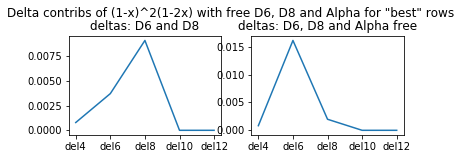

In [10]:
plt.suptitle('Delta contribs of (1-x)^2(1-2x) with free D6, D8 and Alpha for "best" rows')
deltasD6D8 = np.array([abs(x) for x in bestWKinematicRows[0,18:]])
deltasD6D8Alpha = np.array([abs(x) for x in bestWKinematicRows[1,18:]])
deltaVec = ['del4', 'del6', 'del8', 'del10', 'del12']
plt.subplot(2, 2, 1)
plt.title('deltas: D6 and D8')
plt.plot(deltaVec, deltasD6D8)
plt.subplot(2, 2, 2)
plt.title('deltas: D6, D8 and Alpha free')
plt.plot(deltaVec, deltasD6D8Alpha)
plt.show()